# <center>Week 2: Building the Car of the Future</center>
| **Course:** | **Instructor:** | **Full Name:**| **Student ID:** |**Date:**  |**Term**|
| ----------- | -------------- | ---------------| ----------------|-------    |---------|
| ALY6020     | Prof. Chinthaka Pathum Dinesh Herath Gedara  | Abhilash Dikshit| 002702209       |Jan 26, 2024|Winter |



In [45]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import seaborn as sns

In [46]:
# Load the dataset
path = '~/GitProjects/Datasets/car.csv'
data = pd.read_csv(path)
display(data)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,0
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [47]:
data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

## Check for Outliers

In [48]:
data.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000


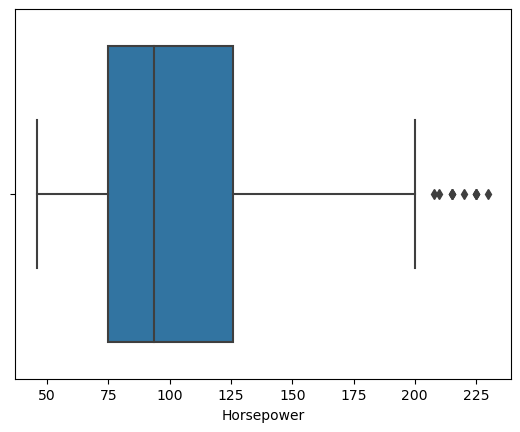

In [52]:
# Check for any outliers in the 'Horsepower' column

# Convert 'Horsepower' to numeric type
data['Horsepower'] = pd.to_numeric(data['Horsepower'], errors='coerce')

# Check for any outliers in the 'Horsepower' column
sns.boxplot(x=data['Horsepower'])
plt.show()

In [53]:
# Remove outliers using the IQR method
Q1 = data['Horsepower'].quantile(0.25)
Q3 = data['Horsepower'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Horsepower'] < (Q1 - 1.5 * IQR)) | (data['Horsepower'] > (Q3 + 1.5 * IQR)))]


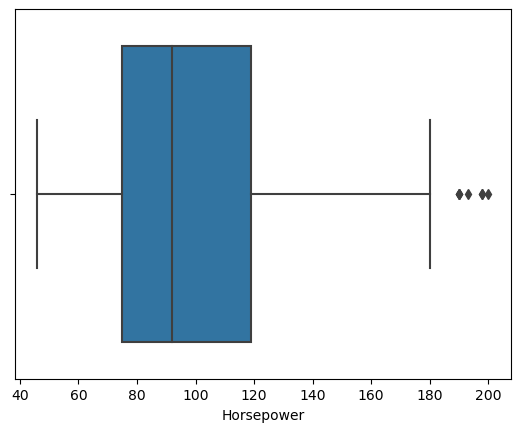

In [54]:
# Verify changes
sns.boxplot(x=data['Horsepower'])
plt.show()

## Exploratory Data Analysis

### Visualize Data Distribution

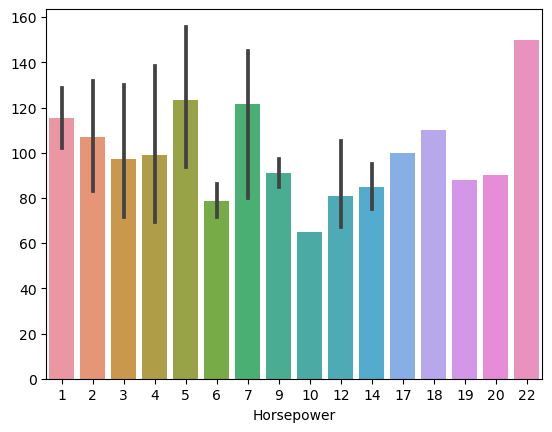

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Horsepower' is a column in your dataframe
sns.barplot(y=data['Horsepower'].value_counts().index, x=data['Horsepower'].value_counts())
plt.xticks(rotation=0)
plt.show()


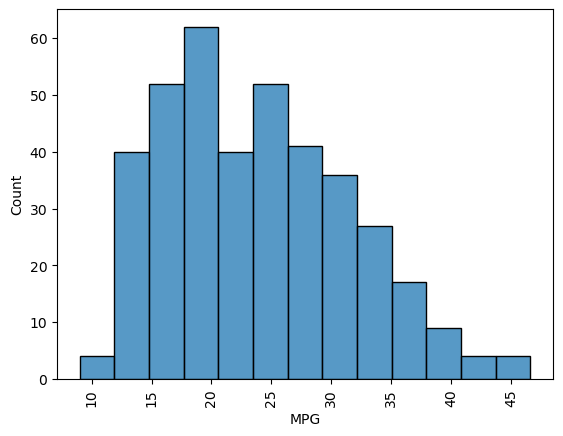

In [56]:
# For 'MPG'
sns.histplot(data['MPG'])
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()


### Correlation Analysis

In [43]:
correlation_matrix = data.corr()
print(correlation_matrix['MPG'].sort_values(ascending=False))


MPG             1.000000
Model Year      0.579267
Acceleration    0.420289
US Made        -0.568192
Cylinders      -0.775396
Displacement   -0.804203
Weight         -0.831741
Name: MPG, dtype: float64


## Part 2: Linear Regression Model

Now, let's build a linear regression model to predict MPG based on the attributes.

### Feature Selection

In [57]:
# Selecting features and target variable
X = data[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'US Made']]
y = data['MPG']

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Create a linear regression model
model = LinearRegression()

In [66]:
from sklearn.impute import SimpleImputer

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data into training and testing sets
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create a linear regression model
model_imputed = LinearRegression()

# Train the model on the imputed data
model_imputed.fit(X_train_imputed, y_train_imputed)

# Make predictions on the test set
y_pred_imputed = model_imputed.predict(X_test_imputed)

# Evaluate the model
mse_imputed = mean_squared_error(y_test_imputed, y_pred_imputed)
r2_imputed = r2_score(y_test_imputed, y_pred_imputed)

print(f'Mean Squared Error (Imputed): {mse_imputed}')
print(f'R2 Score (Imputed): {r2_imputed}')
print(f'Coefficients (Imputed): {model_imputed.coef_}')


Missing Values:
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64
Mean Squared Error (Imputed): 11.34678760774077
R2 Score (Imputed): 0.8263611993273794
Coefficients (Imputed): [-0.20888761  0.02372668 -0.02429554 -0.00725663  0.03501311  0.77819277
 -2.66219836]


## Part 3: Model Optimization

### SelectKBest with the f_regression metric

Let's try an alternative method for feature selection using scikit-learn's SelectKBest with the f_regression metric. This method selects the top k features based on univariate statistical tests.

In [70]:
from sklearn.pipeline import make_pipeline

# Create a pipeline with imputer and SelectKBest
pipeline = make_pipeline(SimpleImputer(strategy='mean'), SelectKBest(score_func=f_regression, k=5), LinearRegression())

# Fit the pipeline on the original data
pipeline.fit(X, y)

# Make predictions on the test set
y_pred_pipeline = pipeline.predict(X_test_imputed)

# Evaluate the model from the pipeline
mse_pipeline = mean_squared_error(y_test_imputed, y_pred_pipeline)
r2_pipeline = r2_score(y_test_imputed, y_pred_pipeline)

print(f'Mean Squared Error (Pipeline): {mse_pipeline}')
print(f'R2 Score (Pipeline): {r2_pipeline}')


Mean Squared Error (Pipeline): 12.384830402316544
R2 Score (Pipeline): 0.8104761301670094


/Users/abidikshit/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
